<a href="https://colab.research.google.com/github/timbax98/Neurodynamics_2023/blob/main/HW2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install brian2
!pip install brian2tools

In [ ]:
!pip install neurodynex

## Question 1

In [ ]:
from pickle import TRUE
from brian2 import *
from brian2tools import *
import neurodynex.tools.input_factory as input_factory

start_scope()
def simple_LIF(input_current, refrac, run_time):
  tau = 20* ms
  gL = 0.1*usiemens
  Vrest = -70*mV


  eqs = '''
  dV/dt = (1/tau)*(-(V-Vrest)+ (I/gL)) : volt (unless refractory)
  I = input_current: amp
  '''

  neuron = NeuronGroup(1,eqs, threshold='V > (-50)*mV', reset = 'V = Vrest', refractory = refrac, method = 'exact')

  neuron.V = Vrest


  M = StateMonitor(neuron, ['V', 'I'], record = True)
  S = SpikeMonitor(neuron)

  lif_net = Network(neuron)
  lif_net.add(M)
  lif_net.add(S)
  lif_net.run(run_time)

  return M, S

In [ ]:
def plot_data(state_monitor, title=None):

    plt.subplot(311)
    plt.plot(state_monitor.t / ms, state_monitor.V[0] / mV, lw=2)

    plt.xlabel("t [ms]")
    plt.ylabel("v [mV]")
    plt.grid()

    
    plt.subplot(312)
    plt.plot(state_monitor.t / ms, state_monitor.I[0] / uamp, lw=2)
    plt.axis((
        0,
        np.max(state_monitor.t / ms),
        min(state_monitor.I[0] / uamp) * 0.9,
        max(state_monitor.I[0] / uamp) * 1.1
    ))

    plt.xlabel("t [ms]")
    plt.ylabel("I [micro A]")
    plt.grid()

    if title is not None:
        plt.suptitle(title)

    plt.show()

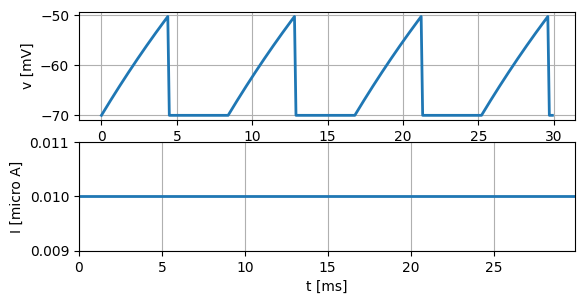

In [ ]:
input = 10*nA
M, S = simple_LIF(input, 4*ms, 30*ms)
plot_data(M)

In [ ]:
def f_I(I, refrac, run):
    _, spikes = simple_LIF(I, 4*ms, 1 * second)
    return len(spikes)

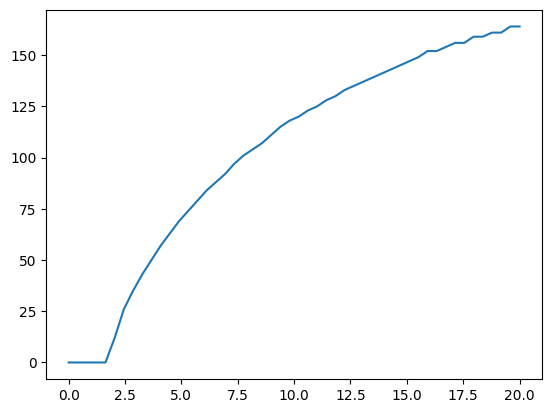

In [ ]:
x_currents = np.linspace(0.0, 20.0, num=50)
frequency = [f_I(current * namp, 4.0 * ms, 1*second) for current in x_currents]

plt.plot(x_currents, frequency)

## Question 2

In [ ]:
import numpy as np

In [ ]:
start_scope()
def simple_LIF2(frequency, refrac, run_time):
  tau = 20* ms
  tauS = 5*ms
  gL = 3*msiemens
  Es = 10*mV
  Vrest = -70*mV
  f = frequency

  P = PoissonGroup(10, np.arange(10)*Hz + frequency)

  eqs = '''
  dV/dt = 1/tau * (-(V - Vrest) - (gS/gL) * (V-Es)) : volt 
  dgS/dt = -1/tauS * gS: siemens
  '''

  neuron = NeuronGroup(1,eqs, threshold='V > (-50)*mV', reset = 'V = Vrest', refractory = refrac, method = 'exponential_euler')

  neuron.V = Vrest


  S = Synapses(P, neuron, on_pre = 'gS += 0.6*msiemens')
  S.connect()


  M = StateMonitor(neuron, ['V', 'gS'], record = True)
  Sp = SpikeMonitor(neuron)

  lif_net = Network(neuron, P)
  lif_net.add(S)
  lif_net.add(M)
  lif_net.add(Sp)
  lif_net.run(run_time)


  return M, Sp

In [ ]:
def plot_data2(state_monitor, title=None):

    plt.subplot(311)
    plt.plot(state_monitor.t / ms, state_monitor.V[0] / mV, lw=2)

    plt.xlabel("t [ms]")
    plt.ylabel("v [mV]")
    plt.grid()

    
    plt.subplot(312)
    plt.plot(state_monitor.t / ms, state_monitor.gS[0] / uamp, lw=2)
    plt.axis((
        0,
        np.max(state_monitor.t / ms),
        min(state_monitor.gS[0] / uamp) * 0.9,
        max(state_monitor.gS[0] / uamp) * 1.1
    ))

    plt.xlabel("t [ms]")
    plt.ylabel("gS[mS]]")
    plt.grid()

    if title is not None:
        plt.suptitle(title)

    plt.show()

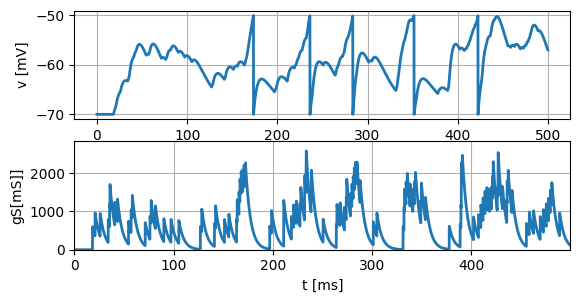

In [ ]:
frequency = 20* Hz
M, S = simple_LIF2(frequency, 4*ms, 500*ms)
plot_data2(M)

In [ ]:
print(S.count)

<spikemonitor.count: array([5], dtype=int32)>


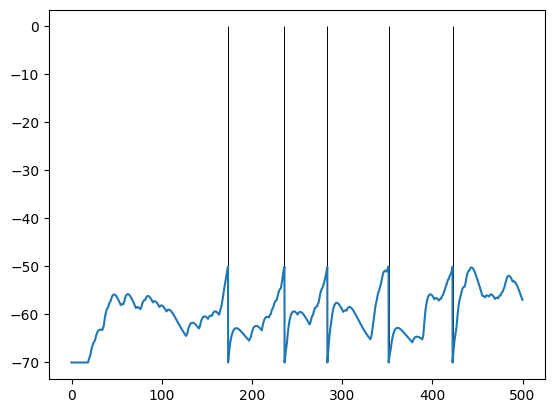

In [ ]:
plt.plot(M.t / ms, M.V[0] / msiemens)
plt.vlines(x = S.t / ms, ymin=-70, ymax = 0, color="black", linestyle="-", lw=0.7, zorder=-10)

In [ ]:
def f_f(hz, refrac):
    _, spikes = simple_LIF2(hz, refrac, 1 * second)
    return len(spikes)

In [ ]:
x_hz = np.linspace(0.0, 200.0, num=20)
y_hz = [f_f(fq * Hz, 4.0*ms) for fq in x_hz]

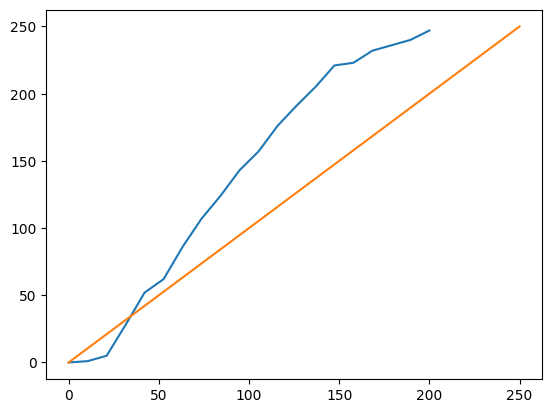

In [ ]:
plt.plot(x_hz, y_hz)
plt.plot([0,250], [0,250])